Name : Prashant Gupta <br>
Roll Number : 2020102030

In [1]:
%matplotlib inline

In [2]:
import nilearn
nilearn.__version__

from nilearn import plotting
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from nilearn.datasets import fetch_miyawaki2008

dataset = fetch_miyawaki2008()

In [5]:
filled_sq = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [6]:
small_hollow = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
plus = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [8]:
mult = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
big_hollow = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
fmri_random_runs_filenames = dataset.func[0:4:]
stimuli_random_runs_filenames = dataset.label[0:4:]

In [11]:
import numpy as np
from nilearn.maskers import MultiNiftiMasker

masker = MultiNiftiMasker(mask_img=dataset.mask, detrend=True,
                          standardize=True)
masker.fit()
fmri_data = masker.transform(fmri_random_runs_filenames)

# shape of the binary (i.e. black and wihte values) image in pixels
stimulus_shape = (10, 10)

# We load the visual stimuli from csv files
stimuli = []
for stimulus_run in stimuli_random_runs_filenames:
    stimuli.append(np.reshape(np.loadtxt(stimulus_run,
                              dtype=int, delimiter=','),
                              (-1,) + stimulus_shape, order='F'))

In [12]:
fmri_data = np.vstack([fmri_run[2:] for fmri_run in fmri_data])
stimuli = np.vstack([stimuli_run[:-2] for stimuli_run in stimuli]).astype(float)

In [13]:
print(fmri_data.shape)

(512, 5438)


In [14]:
stimuli.shape

(512, 10, 10)

In [15]:
shapes_list = np.array((plus,mult,big_hollow,small_hollow,filled_sq))
sum_mat = np.zeros((5,fmri_data.shape[1]),dtype = float)
count_mat = np.zeros((5,1),dtype = int)

for i in range(stimuli.shape[0]):
    for j in range(5):
        if np.array_equal(stimuli[i],shapes_list[j]):
            sum_mat[j] += fmri_data[i]
            count_mat[j] += 1
            break

In [16]:
avg_mat = np.copy(sum_mat)
for i in range(5):
    avg_mat[i:] = sum_mat[i:]/count_mat[i]

In [17]:
def euclidean_distance(x,y):
    return np.sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [18]:
RSA_mat = np.zeros((5,5),dtype = float)

for i in range(5):
    for j in range(5):
        RSA_mat[i][j] = euclidean_distance(avg_mat[i],avg_mat[j])
RSA_mat = RSA_mat/np.max(RSA_mat)
RSA_mat = 1 - RSA_mat
RSA_mat = np.round_(RSA_mat,decimals=2)

In [19]:
RSA_mat = RSA_mat/np.max(RSA_mat)

In [20]:
import seaborn as sns

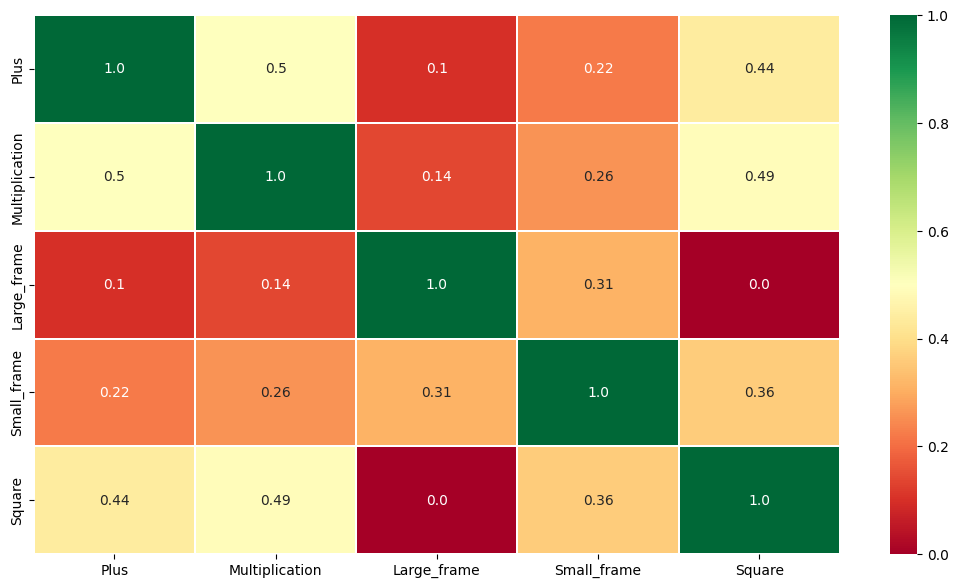

In [21]:
fig, ax = plt.subplots(figsize=(13,7))

x_axis_labels = ['Plus','Multiplication','Large_frame','Small_frame','Square']
y_axis_labels = ['Plus','Multiplication','Large_frame','Small_frame','Square']
sns.heatmap(RSA_mat,annot=True,fmt="",xticklabels=x_axis_labels,yticklabels=y_axis_labels,cmap='RdYlGn',linewidths=0.10)
plt.show()

## Using V1 mask

In [22]:
fmri_random_runs_filenames = dataset.func[0:4:]
stimuli_random_runs_filenames = dataset.label[0:4:]

In [23]:
import numpy as np
from nilearn.maskers import MultiNiftiMasker

mask_loc = '/Users/rkgupta/Downloads/Miyawaki_V1_ROImask.nii.gz'

masker = MultiNiftiMasker(mask_img=mask_loc, detrend=True,
                          standardize=True)
masker.fit()
fmri_data = masker.transform(fmri_random_runs_filenames)

# shape of the binary (i.e. black and wihte values) image in pixels
stimulus_shape = (10, 10)

# We load the visual stimuli from csv files
stimuli = []
for stimulus_run in stimuli_random_runs_filenames:
    stimuli.append(np.reshape(np.loadtxt(stimulus_run,
                              dtype=int, delimiter=','),
                              (-1,) + stimulus_shape, order='F'))

In [24]:
fmri_data = np.vstack([fmri_run[2:] for fmri_run in fmri_data])
stimuli = np.vstack([stimuli_run[:-2] for stimuli_run in stimuli]).astype(float)

In [25]:
print(fmri_data.shape)

(512, 1017)


In [26]:
stimuli.shape

(512, 10, 10)

In [27]:
shapes_list = np.array((plus,mult,big_hollow,small_hollow,filled_sq))
sum_mat = np.zeros((5,fmri_data.shape[1]),dtype = float)
count_mat = np.zeros((5,1),dtype = int)

for i in range(stimuli.shape[0]):
    for j in range(5):
        if np.array_equal(stimuli[i],shapes_list[j]):
            sum_mat[j] += fmri_data[i]
            count_mat[j] += 1
            break

In [28]:
avg_mat = np.copy(sum_mat)
for i in range(5):
    avg_mat[i:] = sum_mat[i:]/count_mat[i]

In [29]:
RSA_mat = np.zeros((5,5),dtype = float)

for i in range(5):
    for j in range(5):
        RSA_mat[i][j] = euclidean_distance(avg_mat[i],avg_mat[j])
RSA_mat = RSA_mat/np.max(RSA_mat)
RSA_mat = 1 - RSA_mat
RSA_mat = np.round_(RSA_mat,decimals=2)

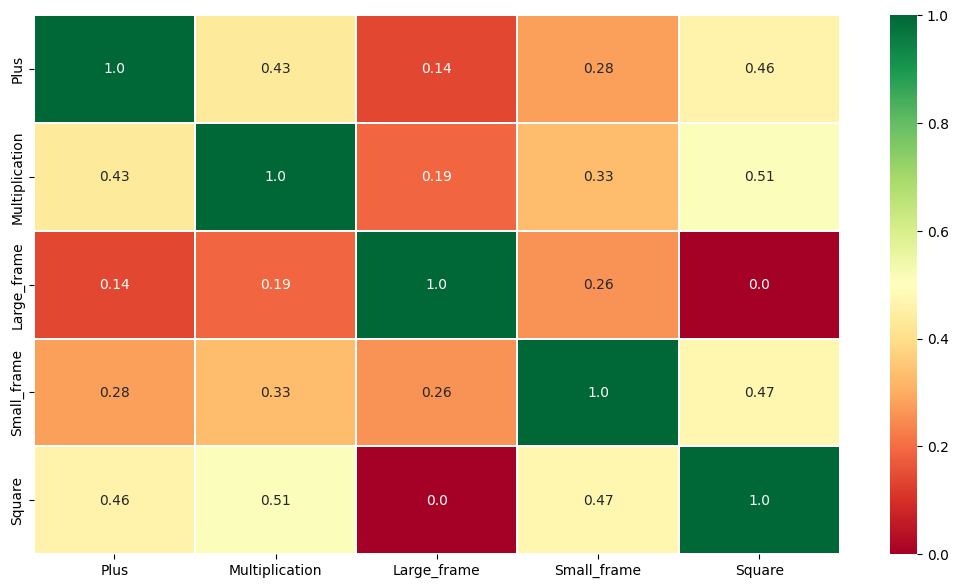

In [30]:
fig, ax = plt.subplots(figsize=(13,7))

x_axis_labels = ['Plus','Multiplication','Large_frame','Small_frame','Square']
y_axis_labels = ['Plus','Multiplication','Large_frame','Small_frame','Square']
sns.heatmap(RSA_mat,annot=True,fmt="",xticklabels=x_axis_labels,yticklabels=y_axis_labels,cmap='RdYlGn',linewidths=0.30)
plt.show()

## With V4 mask

In [31]:
fmri_random_runs_filenames = dataset.func[0:4:]
stimuli_random_runs_filenames = dataset.label[0:4:]

In [32]:
import numpy as np
from nilearn.maskers import MultiNiftiMasker

mask_loc = '/Users/rkgupta/Downloads/Miyawaki_V4_ROImask.nii.gz'

masker = MultiNiftiMasker(mask_img=mask_loc, detrend=True,
                          standardize=True)
masker.fit()
fmri_data = masker.transform(fmri_random_runs_filenames)

# shape of the binary (i.e. black and wihte values) image in pixels
stimulus_shape = (10, 10)

# We load the visual stimuli from csv files
stimuli = []
for stimulus_run in stimuli_random_runs_filenames:
    stimuli.append(np.reshape(np.loadtxt(stimulus_run,
                              dtype=int, delimiter=','),
                              (-1,) + stimulus_shape, order='F'))

In [33]:
fmri_data = np.vstack([fmri_run[2:] for fmri_run in fmri_data])
stimuli = np.vstack([stimuli_run[:-2] for stimuli_run in stimuli]).astype(float)

In [34]:
print(fmri_data.shape)

(512, 557)


In [35]:
stimuli.shape

(512, 10, 10)

In [36]:
shapes_list = np.array((plus,mult,big_hollow,small_hollow,filled_sq))
sum_mat = np.zeros((5,fmri_data.shape[1]),dtype = float)
count_mat = np.zeros((5,1),dtype = int)

for i in range(stimuli.shape[0]):
    for j in range(5):
        if np.array_equal(stimuli[i],shapes_list[j]):
            sum_mat[j] += fmri_data[i]
            count_mat[j] += 1
            break

In [37]:
avg_mat = np.copy(sum_mat)
for i in range(5):
    avg_mat[i:] = sum_mat[i:]/count_mat[i]

In [38]:
RSA_mat = np.zeros((5,5),dtype = float)

for i in range(5):
    for j in range(5):
        RSA_mat[i][j] = euclidean_distance(avg_mat[i],avg_mat[j])
RSA_mat = RSA_mat/np.max(RSA_mat)
RSA_mat = 1 - RSA_mat
RSA_mat = np.round_(RSA_mat,decimals=2)

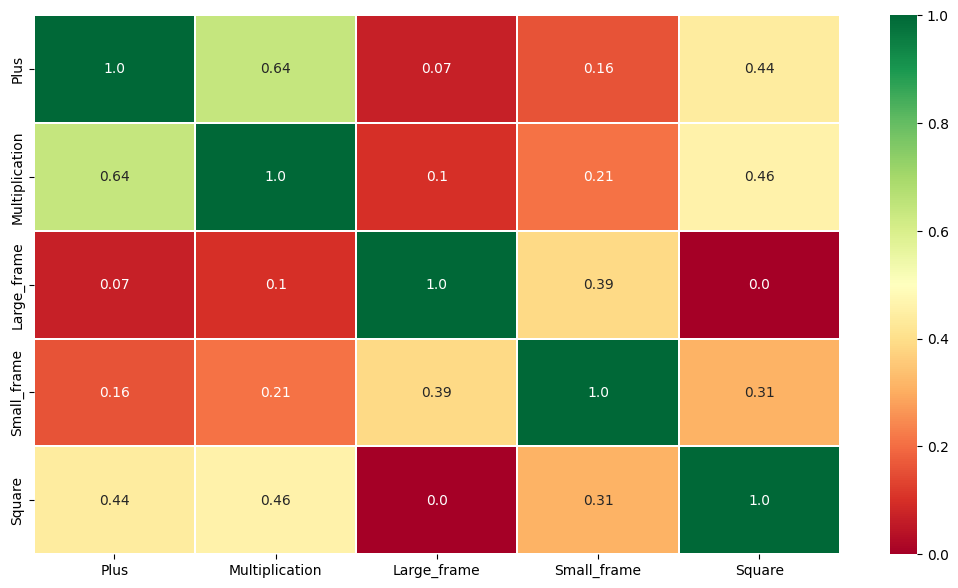

In [39]:
fig, ax = plt.subplots(figsize=(13,7))

x_axis_labels = ['Plus','Multiplication','Large_frame','Small_frame','Square']
y_axis_labels = ['Plus','Multiplication','Large_frame','Small_frame','Square']
sns.heatmap(RSA_mat,annot=True,fmt="",xticklabels=x_axis_labels,yticklabels=y_axis_labels,cmap='RdYlGn',linewidths=0.30)
plt.show()

# RSA matrices for Alphabets

In [40]:
o_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [41]:
o_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [42]:
r_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [43]:
r_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [44]:
u_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [45]:
u_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [46]:
e_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [47]:
e_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [48]:
n_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [49]:
n_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [50]:
fmri_random_runs_filenames = dataset.func[4:12:]
stimuli_random_runs_filenames = dataset.label[4:12:]

## Using Ventral Cortex Mask

In [51]:
import numpy as np
from nilearn.maskers import MultiNiftiMasker


masker = MultiNiftiMasker(mask_img=dataset.mask, detrend=True,
                          standardize=True)
masker.fit()
fmri_data = masker.transform(fmri_random_runs_filenames)

# shape of the binary (i.e. black and wihte values) image in pixels
stimulus_shape = (10, 10)

# We load the visual stimuli from csv files
stimuli = []
for stimulus_run in stimuli_random_runs_filenames:
    stimuli.append(np.reshape(np.loadtxt(stimulus_run,
                              dtype=int, delimiter=','),
                              (-1,) + stimulus_shape, order='F'))

In [52]:
fmri_data = np.vstack([fmri_run[2:] for fmri_run in fmri_data])
stimuli = np.vstack([stimuli_run[:-2] for stimuli_run in stimuli]).astype(float)

In [53]:
stimuli.shape

(1024, 10, 10)

In [54]:
alphabets_list = np.array((n_1,e_1,u_1,r_1,o_1,n_2,e_2,u_2,r_2,o_2))
sum_mat = np.zeros((5,fmri_data.shape[1]),dtype = float)
count_mat = np.zeros((5,1),dtype = int)

for i in range(stimuli.shape[0]):
    for j in range(10):
        if np.array_equal(stimuli[i],alphabets_list[j]):
            sum_mat[j%5] += fmri_data[i]
            count_mat[j%5] += 1
            break

In [55]:
avg_mat = np.copy(sum_mat)
for i in range(5):
    avg_mat[i:] = sum_mat[i:]/count_mat[i]

In [56]:
RSA_mat = np.zeros((5,5),dtype = float)

for i in range(5):
    for j in range(5):
        RSA_mat[i][j] = euclidean_distance(avg_mat[i],avg_mat[j])
RSA_mat = RSA_mat/np.max(RSA_mat)
RSA_mat = 1 - RSA_mat
RSA_mat = np.round_(RSA_mat,decimals=2)

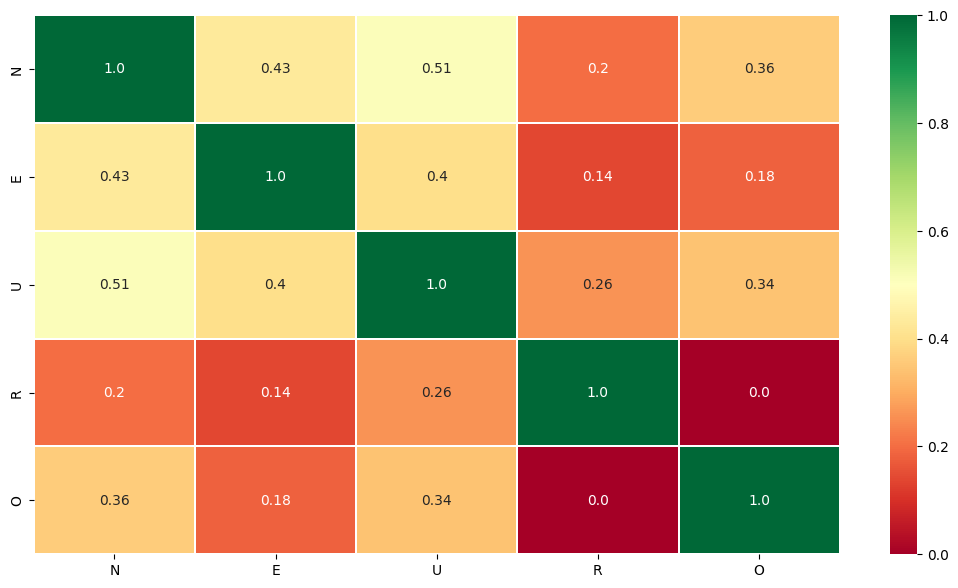

In [57]:
fig, ax = plt.subplots(figsize=(13,7))

x_axis_labels = ['N','E','U','R','O']
y_axis_labels = ['N','E','U','R','O']
sns.heatmap(RSA_mat,annot=True,fmt="",xticklabels=x_axis_labels,yticklabels=y_axis_labels,cmap='RdYlGn',linewidths=0.30)
plt.show()

## Using V1 Mask

In [58]:
import numpy as np
from nilearn.maskers import MultiNiftiMasker

mask_loc = '/Users/rkgupta/Downloads/Miyawaki_V1_ROImask.nii.gz'

masker = MultiNiftiMasker(mask_img=mask_loc, detrend=True,
                          standardize=True)
masker.fit()
fmri_data = masker.transform(fmri_random_runs_filenames)

# shape of the binary (i.e. black and wihte values) image in pixels
stimulus_shape = (10, 10)

# We load the visual stimuli from csv files
stimuli = []
for stimulus_run in stimuli_random_runs_filenames:
    stimuli.append(np.reshape(np.loadtxt(stimulus_run,
                              dtype=int, delimiter=','),
                              (-1,) + stimulus_shape, order='F'))

In [59]:
fmri_data = np.vstack([fmri_run[2:] for fmri_run in fmri_data])
stimuli = np.vstack([stimuli_run[:-2] for stimuli_run in stimuli]).astype(float)

In [60]:
alphabets_list = np.array((n_1,e_1,u_1,r_1,o_1,n_2,e_2,u_2,r_2,o_2))
sum_mat = np.zeros((5,fmri_data.shape[1]),dtype = float)
count_mat = np.zeros((5,1),dtype = int)

for i in range(stimuli.shape[0]):
    for j in range(10):
        if np.array_equal(stimuli[i],alphabets_list[j]):
            sum_mat[j%5] += fmri_data[i]
            count_mat[j%5] += 1
            break

In [61]:
avg_mat = np.copy(sum_mat)
for i in range(5):
    avg_mat[i:] = sum_mat[i:]/count_mat[i]

In [62]:
RSA_mat = np.zeros((5,5),dtype = float)

for i in range(5):
    for j in range(5):
        RSA_mat[i][j] = euclidean_distance(avg_mat[i],avg_mat[j])
RSA_mat = RSA_mat/np.max(RSA_mat)
RSA_mat = 1 - RSA_mat
RSA_mat = np.round_(RSA_mat,decimals=2)

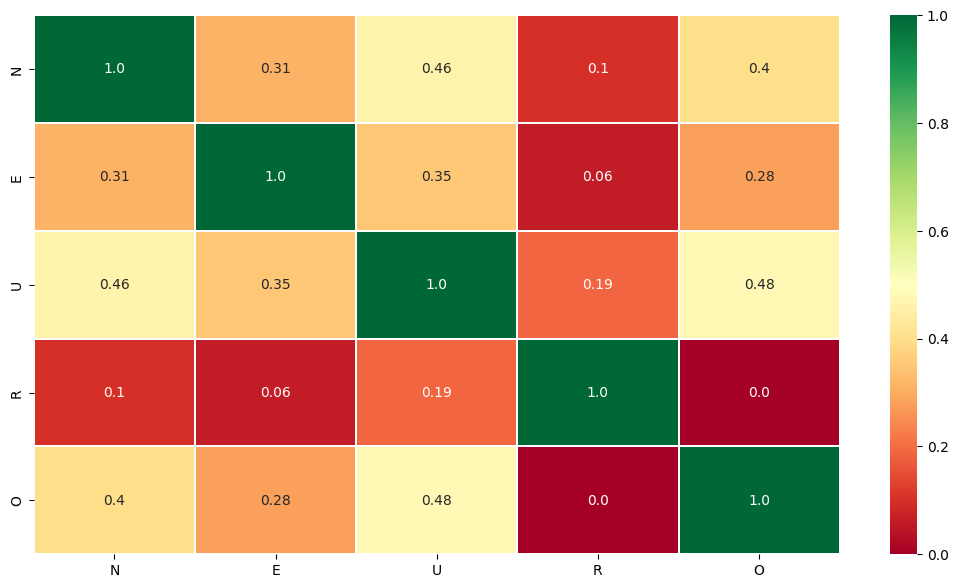

In [63]:
fig, ax = plt.subplots(figsize=(13,7))

x_axis_labels = ['N','E','U','R','O']
y_axis_labels = ['N','E','U','R','O']
sns.heatmap(RSA_mat,annot=True,fmt="",xticklabels=x_axis_labels,yticklabels=y_axis_labels,cmap='RdYlGn',linewidths=0.30)
plt.show()

## Using V4 Mask

In [64]:
import numpy as np
from nilearn.maskers import MultiNiftiMasker

mask_loc = '/Users/rkgupta/Downloads/Miyawaki_V4_ROImask.nii.gz'

masker = MultiNiftiMasker(mask_img=mask_loc, detrend=True,
                          standardize=True)
masker.fit()
fmri_data = masker.transform(fmri_random_runs_filenames)

# shape of the binary (i.e. black and wihte values) image in pixels
stimulus_shape = (10, 10)

# We load the visual stimuli from csv files
stimuli = []
for stimulus_run in stimuli_random_runs_filenames:
    stimuli.append(np.reshape(np.loadtxt(stimulus_run,
                              dtype=int, delimiter=','),
                              (-1,) + stimulus_shape, order='F'))

In [65]:
fmri_data = np.vstack([fmri_run[2:] for fmri_run in fmri_data])
stimuli = np.vstack([stimuli_run[:-2] for stimuli_run in stimuli]).astype(float)

In [66]:
alphabets_list = np.array((n_1,e_1,u_1,r_1,o_1,n_2,e_2,u_2,r_2,o_2))
sum_mat = np.zeros((5,fmri_data.shape[1]),dtype = float)
count_mat = np.zeros((5,1),dtype = int)

for i in range(stimuli.shape[0]):
    for j in range(10):
        if np.array_equal(stimuli[i],alphabets_list[j]):
            sum_mat[j%5] += fmri_data[i]
            count_mat[j%5] += 1
            break

In [67]:
avg_mat = np.copy(sum_mat)
for i in range(5):
    avg_mat[i:] = sum_mat[i:]/count_mat[i]

In [68]:
RSA_mat = np.zeros((5,5),dtype = float)

for i in range(5):
    for j in range(5):
        RSA_mat[i][j] = euclidean_distance(avg_mat[i],avg_mat[j])
RSA_mat = RSA_mat/np.max(RSA_mat)
RSA_mat = 1 - RSA_mat
RSA_mat = np.round_(RSA_mat,decimals=2)

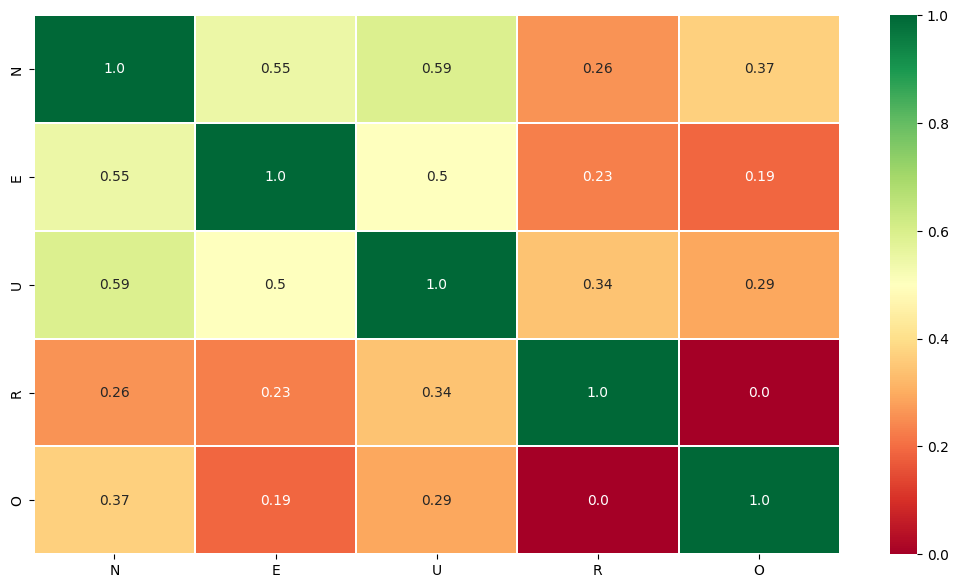

In [69]:
fig, ax = plt.subplots(figsize=(13,7))

x_axis_labels = ['N','E','U','R','O']
y_axis_labels = ['N','E','U','R','O']
sns.heatmap(RSA_mat,annot=True,fmt="",xticklabels=x_axis_labels,yticklabels=y_axis_labels,cmap='RdYlGn',linewidths=0.30)
plt.show()

## Observations - Shapes (For all Masks)

From the RSM matrices computed in the first three matrices plotted we can observe that Large Frame and Square have the least similarity because if we compare the structure of both of them the pixels in which they are pixel are totally different and hence it has the least similarity.(Note : The figure only shows relative similarity and no absolute values). 

On the other hand the the plus and multiplication have high similarity because they have a lot of pixels in common which are white and also from part - 1 we have seen that the receptive fields are responding to shapes of plus and multiplication and hence they are having more similar fMRI values.

## Observations - Alphabets (For all Masks)
From the RSM matrices computed in the last three matrices plotted we can observe that N and U have the highest similarity values in general. This can be attributed to the similar voxels they activate in the brain and also due to their pixel similarities.

On the other hand R and O have the least similarity. The reason can also be justified in a similar way as above that since they activate different voxels hence their Euclidean distance is the maximum and hence they will have the least similarity.